# Data Manipulation and Cleaning

### Adam Marley 


## Data Set

The dataset used in this project comes from the 2017 Halloween Candy Hierarchy survey, which collected public opinions on various types of candy. Participants rated each candy based on how they felt about receiving it in their Halloween haul, classifying them as "JOY" (loved it), "MEH" (indifferent), or "DESPAIR" (would rather not receive it).

Since the survey allowed open-ended responses, the dataset presents a typical real-world challenge with messy data, including inconsistencies in text entries and potential inappropriate comments.

## Introduction

My goal for this analysis is to explore and understand the results of the Halloween Candy Hierarchy survey. I want to focus on overall candy preferences and the demographics of the respondents. 3 areas that I will look at specifically are trick-or-treating participation, age distribution, and sentiment toward specific candies. 

It is important to note that this data is not from an experiment. The data was not collected in a controlled way so the results of this analysis will not be conclusive. However there still can be some valuable insights into what are the popular candies and how respondents engage with the survey.

## Initial Import & Exploration

In [1]:
# initial imports
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

# Other settings
pd.set_option('display.max_columns', 20)
import warnings
warnings.filterwarnings("ignore")

I include `encoding='iso-8859-1'` during the import because there are special characters in the data which Pandas doesn't recognize.

In [2]:
# read_csv with iso-8859-1 encoding;
candy_full = pd.read_csv('candy.csv', encoding='iso-8859-1')

# copying to new dataframe
candy = candy_full.copy()

# look at the head() data for quick overview:
candy.head(2)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"


In [3]:
# list all the column names vertically with a for loop for better visualization
for col in candy.columns:
    print(col)

Internal ID
Q1: GOING OUT?
Q2: GENDER
Q3: AGE
Q4: COUNTRY
Q5: STATE, PROVINCE, COUNTY, ETC
Q6 | 100 Grand Bar
Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)
Q6 | Any full-sized candy bar
Q6 | Black Jacks
Q6 | Bonkers (the candy)
Q6 | Bonkers (the board game)
Q6 | Bottle Caps
Q6 | Box'o'Raisins
Q6 | Broken glow stick
Q6 | Butterfinger
Q6 | Cadbury Creme Eggs
Q6 | Candy Corn
Q6 | Candy that is clearly just the stuff given out for free at restaurants
Q6 | Caramellos
Q6 | Cash, or other forms of legal tender
Q6 | Chardonnay
Q6 | Chick-o-Sticks (we donÕt know what that is)
Q6 | Chiclets
Q6 | Coffee Crisp
Q6 | Creepy Religious comics/Chick Tracts
Q6 | Dental paraphenalia
Q6 | Dots
Q6 | Dove Bars
Q6 | Fuzzy Peaches
Q6 | Generic Brand Acetaminophen
Q6 | Glow sticks
Q6 | Goo Goo Clusters
Q6 | Good N' Plenty
Q6 | Gum from baseball cards
Q6 | Gummy Bears straight up
Q6 | Hard Candy
Q6 | Healthy Fruit
Q6 | Heath Bar
Q6 | Hershey's Dark Chocolate
Q6 | HersheyÕ

The data columns here is not tidy for data analysis. The first step to do is the data cleaning:

## Initial Data Cleaning

Sometimes the character: `Õ` appears but this instead makes more sense to be an apostrophe `'` mark. I will manipulated the column names that have this special symbol and instead use an apostrophe:

In [4]:
### Get the column names into a variable to manipulate later. I found 4 instances of the special character
column_name_1 = candy.columns

# Dictionary comprehension to change the symbol using the replace() method
new_column_names = {col: col.replace("Õ", "'") for col in column_name_1 if "Õ" in col}

# Assign it back to dataframe
candy = candy.rename(columns=new_column_names)

# Checking if it got all of them:
for col in candy.columns:
    print(col)


Internal ID
Q1: GOING OUT?
Q2: GENDER
Q3: AGE
Q4: COUNTRY
Q5: STATE, PROVINCE, COUNTY, ETC
Q6 | 100 Grand Bar
Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)
Q6 | Any full-sized candy bar
Q6 | Black Jacks
Q6 | Bonkers (the candy)
Q6 | Bonkers (the board game)
Q6 | Bottle Caps
Q6 | Box'o'Raisins
Q6 | Broken glow stick
Q6 | Butterfinger
Q6 | Cadbury Creme Eggs
Q6 | Candy Corn
Q6 | Candy that is clearly just the stuff given out for free at restaurants
Q6 | Caramellos
Q6 | Cash, or other forms of legal tender
Q6 | Chardonnay
Q6 | Chick-o-Sticks (we don't know what that is)
Q6 | Chiclets
Q6 | Coffee Crisp
Q6 | Creepy Religious comics/Chick Tracts
Q6 | Dental paraphenalia
Q6 | Dots
Q6 | Dove Bars
Q6 | Fuzzy Peaches
Q6 | Generic Brand Acetaminophen
Q6 | Glow sticks
Q6 | Goo Goo Clusters
Q6 | Good N' Plenty
Q6 | Gum from baseball cards
Q6 | Gummy Bears straight up
Q6 | Hard Candy
Q6 | Healthy Fruit
Q6 | Heath Bar
Q6 | Hershey's Dark Chocolate
Q6 | Hershey'

Checking for duplicated row entries:

In [5]:
candy.duplicated().sum()
### 17

17

Now I will try and find duplicated entries that have the same 'Internal ID' and get the total of them

In [6]:
candy['Internal ID'].duplicated().sum()
### 19

19

Drop the duplicates that I found. If there are duplicates I will keep the first one and delete the others with the 'keep' argument set to 'first'. Also I will make sure to assign this back to my data frame 'candy'

In [7]:
candy = candy.drop_duplicates(subset='Internal ID', keep='first')

## What percentage of sample planned on going trick-or-treating?

I want to see how many of respondents that I still have with the cleaned data will plan on going trick-or-treating or not:

In [8]:
# I want to see how many rows of data are still left
len(candy['Q1: GOING OUT?'])
# 2460

2460

In [9]:
# I also want to see what the null values are 
candy['Q1: GOING OUT?'].isna().sum()
# 111

111

In [10]:
# Because the null values are about 4.5% of the data for this column
# I will remove the null values
candy_droped = candy[candy['Q1: GOING OUT?'].notnull()]
len(candy_droped)
#2349

2349

In [11]:
# Now I will use the candy_droped dataset for answering what was the 
# percentage of respondants that planned on going trick-or-treating
candy_droped['Q1: GOING OUT?'].value_counts()
# No = 2037
# Yes = 312
# Total = 2349

Q1: GOING OUT?
No     2037
Yes     312
Name: count, dtype: int64

### Result
312 / 2349 = 13.3 % plan on going trick-or-treating

2037 / 2349 = 86.7 % do not plan on going trick-or-treating

When considering the Data it is helpful to know that the majority of the data is coming from people who do not plan on going out to trick-or-treat. If the sample were taking from only people who planned on going out to trick-or-treat the data would most likely look different

## What are the value counts and the normalized percentages of the age categories from the age column?

In [12]:
# First I want to examine all the values to check for clean data
for i in candy['Q3: AGE']:
    print(i)
# Looking through the data I see that there are null values and
# also values that have text in them which won't work for an analysis

nan
44
49
40
23
nan
53
33
40
53
43
56
64
43
37
64
59
48
54
36
45
33
37
49
48
25
34
35
38
58
48
35
50
33
47
16
nan
52
33
63
34
48
52
52
65
45
41
27
47
47
44
49
31
59
50
34
34
61
44
46
54
56
43
41
46
50
42
62
37
45
53
62
40
40
29
33
34
42
48
39
36
38
32
48
33
38
37
44
31
48
37
28
45
42
69
50
64
42
35
44
nan
44
42
43
37
47
50
67
33
39
30
25
29
53
nan
22
50
44
46
26
53
nan
41
62
48
49
37
63
54
51
42
70
33
67
65
46
48
51
53
42
44
37
43
53
64
47
45
38
37
nan
33
43
36
34
50
50
48
51
43
54
38
38
43
49
53
45
37
35
28
41
33
24
50
61
38
43
36
36
39
33
37
27
35
18
49
45
34
nan
38
nan
37
40
46
36
49
47
25
41
40
37
19
39
47
Old enough
31
48
57
53
60
66
45
27
56
34
31
70
24
12
39
32
52
29
38
32
42
54
38
53
30
34
40
54
39
40
32
33
28
30
62
31
36
49
38
44
44
52
51
Many
52
37
57
65
44
60
42
39
57
36
48
42
50
40
43
60
55
40
34
56
65
40
56
59
42
57
31
12
38
32
45
39
31
40
48
50
28
51
49
48
43
64
56
35
52
72
29
32
37
42
38
36
22
40
50
44
70
45
52
51
47
41
38
38
52
43
35
30
34
56
33
34
60
37
60
41
27
?
39
4

In [13]:
# First I will handle the null values and see how many there are
candy['Q3: AGE'].isnull().sum()
# 85

# Because only 3 % of the data is null I will remove these values
candy_dropped2 = candy[candy['Q3: AGE'].notnull()]

In [14]:
# Viewing the data after removing the null values
for i in candy_dropped2['Q3: AGE']:
    print(i)
# I still see uncleaned data with strings and numbers that won't work

44
49
40
23
53
33
40
53
43
56
64
43
37
64
59
48
54
36
45
33
37
49
48
25
34
35
38
58
48
35
50
33
47
16
52
33
63
34
48
52
52
65
45
41
27
47
47
44
49
31
59
50
34
34
61
44
46
54
56
43
41
46
50
42
62
37
45
53
62
40
40
29
33
34
42
48
39
36
38
32
48
33
38
37
44
31
48
37
28
45
42
69
50
64
42
35
44
44
42
43
37
47
50
67
33
39
30
25
29
53
22
50
44
46
26
53
41
62
48
49
37
63
54
51
42
70
33
67
65
46
48
51
53
42
44
37
43
53
64
47
45
38
37
33
43
36
34
50
50
48
51
43
54
38
38
43
49
53
45
37
35
28
41
33
24
50
61
38
43
36
36
39
33
37
27
35
18
49
45
34
38
37
40
46
36
49
47
25
41
40
37
19
39
47
Old enough
31
48
57
53
60
66
45
27
56
34
31
70
24
12
39
32
52
29
38
32
42
54
38
53
30
34
40
54
39
40
32
33
28
30
62
31
36
49
38
44
44
52
51
Many
52
37
57
65
44
60
42
39
57
36
48
42
50
40
43
60
55
40
34
56
65
40
56
59
42
57
31
12
38
32
45
39
31
40
48
50
28
51
49
48
43
64
56
35
52
72
29
32
37
42
38
36
22
40
50
44
70
45
52
51
47
41
38
38
52
43
35
30
34
56
33
34
60
37
60
41
27
?
39
42
40
60
38
64
59
50
35
44
49
21
58
3

In [15]:
# Putting the age values in a column for further cleaning
age_unclean_values = candy_dropped2['Q3: AGE']
# for i in age_unclean_values:
#     print(i)

# I will use the pd.to_numeric() to help clean by converting 
# any strings into null values
age_converted = pd.to_numeric(age_unclean_values, errors='coerce')

#len(age_converted) = 2375

# Get rid of the nulls in the Series
clean_age1 = age_converted.dropna()
#len(clean_age1) = 2350

In [16]:
# Checking the clean data series
clean_age1.value_counts().sort_index().head(18)
# I see ages from 1. I want to cut off the ages 9 and under

Q3: AGE
1.0      1
4.0      1
6.0      2
7.0      2
8.0      2
9.0      4
10.0     3
11.0     7
12.0     9
13.0     6
14.0     2
15.0     8
16.0     4
17.0     5
18.0    10
19.0     3
20.0    12
21.0    14
Name: count, dtype: int64

In [17]:
# Checking the clean data series
clean_age1.value_counts().sort_index().tail(18)
# I see ages from 1. I want to cut off the ages 100 or over

Q3: AGE
67.0      6
68.0      8
69.0      5
70.0      8
71.0      6
72.0      6
73.0      4
74.0      1
75.0      3
76.0      2
77.0      1
88.0      1
90.0      2
99.0      1
100.0     2
102.0     1
312.0     1
1000.0    1
Name: count, dtype: int64

In [18]:
# Keep the values that are between 10 and 99
clean_age2 = clean_age1[(clean_age1 >= 10) & (clean_age1 <=99)]
#len(clean_age2)# = 2333

<Axes: >

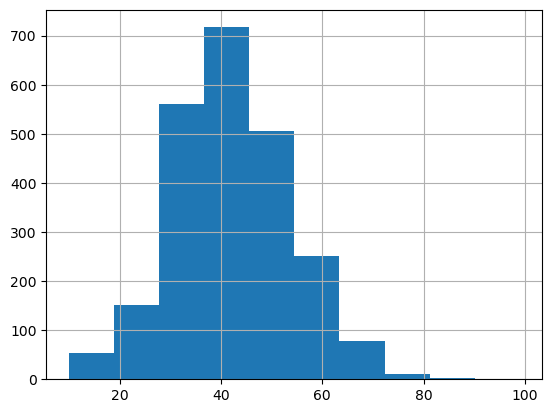

In [19]:
# Plot the remaining cleaned data to histogram to show distribution
clean_age2.hist()
# Histogram shows a normal distribution that is centered around the age
# 40.

In [20]:
# I want to place the ages into different categories for an easier
# Overview of the data. Data is already floats, no conversion needed

# Use pd.Cut
bins = [10, 21, 31, 41, 51, 61, 71, 81, 90, float('inf')]
labels = ['10 - 20', '21 - 30', '31 - 40', '41 - 50', '51 -60', '61 - 70', '71 - 80', '81 - 90', 'Over 90']

# Categorize the ages
categorized_ages = pd.cut(clean_age2, bins=bins, labels=labels)

# Check how many values are in each bin/basket
categorized_ages.value_counts()


Q3: AGE
31 - 40    790
41 - 50    679
51 -60     354
21 - 30    294
61 - 70    112
10 - 20     80
71 - 80     17
81 - 90      3
Over 90      1
Name: count, dtype: int64

## Results

I organized the ages into different categories to make them more managable to interpret. The value counts are as follows:

31 - 40 year olds = 790

41 - 50 year olds = 679

51 -60 year olds  = 354

21 - 30 year olds = 294

61 - 70 year olds = 112

10 - 20 year olds = 80

71 - 80 year olds = 17

81 - 90 year olds = 3

Over 90 year olds = 1

In [21]:
# Check what the percentage of the whole is each categoris with 
# normalize argument and rouning
round(categorized_ages.value_counts(normalize=True) * 100,2)

Q3: AGE
31 - 40    33.91
41 - 50    29.14
51 -60     15.19
21 - 30    12.62
61 - 70     4.81
10 - 20     3.43
71 - 80     0.73
81 - 90     0.13
Over 90     0.04
Name: proportion, dtype: float64

## Results

Here are the results so that they are organized by percentage of the whole:

31 - 40 year olds = 33.9 %

41 - 50 year olds = 29.1 %

51 -60 year olds  = 15.2 %

21 - 30 year olds = 12.6 %

61 - 70 year olds = 4.8 %

10 - 20 year olds = 3.4 %

71 - 80 year olds = 0.7 %

81 - 90 year olds = 0.1 %

Over 90 year olds = < 0.1 %

### Convert categorical responses (JOY, MEH, DESPAIR) into numerical sentiment scores (e.g., 2 for JOY, 1 for MEH, 0 for DESPAIR) and analyze distributions.

In [22]:
# First grab only the columns that are needed
candy_sentiment = candy.loc[:,'Q6 | 100 Grand Bar':'Q6 | York Peppermint Patties']
candy_sentiment
# I want to find the top 3 candy that had the highest 'JOY' COUNTS
#joy_counts = candy_sentiment.apply(lambda col: col.eq('JOY').sum())

# Sort the values from greatest to least
#joy_counts.sort_values(ascending=False).head(10)


,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,...,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
2475,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,...,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY
2476,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,...,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to use the top 4 candies and look more into their sentiment scores and distributions. Some of the top columns do not represent specific candies. I will take the top four specified candies which are:

**Reese's Peanut Butter Cups** = 1497 JOY 

**Kit Kat** = 1446 JOY

**Twix** = 1412 JOY

**Snickers** = 1398 JOY

In [23]:
# Make a new dataset only for the top 4 chosen candies
top4_candies = candy[['Q6 | Reese\'s Peanut Butter Cups', 'Q6 | Kit Kat', 'Q6 | Twix', 'Q6 | Snickers']]

# Rename the column names so that they are easier to understand (aka Removing the "Q6 |" at the beginning)
top4_candies = top4_candies.rename(columns={'Q6 | Reese\'s Peanut Butter Cups':'Reese\'s Peanut Butter Cups', 'Q6 | Kit Kat':'Kit Kat', 'Q6 | Twix':'Twix', 'Q6 | Snickers':'Snickers'})

# Inspect the new dataset
top4_candies.head(6)

,Reese's Peanut Butter Cups,Kit Kat,Twix,Snickers
0,NaN,NaN,NaN,NaN
1,JOY,JOY,JOY,MEH
2,NaN,NaN,NaN,NaN
3,JOY,MEH,JOY,JOY
4,JOY,JOY,JOY,NaN
5,JOY,JOY,JOY,JOY


Next, I want to check if the values are all consistent for each of the columns. I run the code below one at a time making sure that there are no unexpected values.

In [24]:
top4_candies['Reese\'s Peanut Butter Cups'].value_counts()

top4_candies['Kit Kat'].value_counts()

top4_candies['Twix'].value_counts()

top4_candies['Snickers'].value_counts()

Snickers
JOY        1398
MEH         292
DESPAIR      79
Name: count, dtype: int64

When I ran each line above, the value counts were consistent with anticipated values of JOY, MEH, DESPAIR

In [25]:
# Next I am defining a mapping:
mapping = {
    'JOY': 1.0,
    'MEH': 0.0,
    'DESPAIR': -1.0
}

# Creating a new dataframe with numerical scores
top4_numeric = top4_candies.replace(mapping)

# Check and see if the values were replaced
top4_numeric.head(30)

# Check the length
len(top4_numeric)
# 2460

# Checking the missing values for this updated dataset
top4_numeric.isnull().sum()


Reese's Peanut Butter Cups    680
Kit Kat                       675
Twix                          691
Snickers                      691
dtype: int64

I notice that there are a lot of missing values for the selected columns especially when considering that the whole dataset is only 2460 rows.

**Reese's Peanut Butter Cups** = 680

**Kit Kat** = 675

**Twix** = 691

**Snickers** = 691


I want to check if this these amounts of missing data are common for the other columns as well

In [26]:
# I look through the results of the for loop to see how many missing values are in all the specified candy columns
for i in candy_sentiment.isnull().sum():
    print(i)

748
735
673
959
993
1007
766
689
707
683
684
679
692
753
681
744
947
712
854
705
693
729
703
824
732
698
880
735
717
698
696
695
713
674
673
679
714
695
696
1027
699
943
745
946
675
737
731
687
686
719
692
726
1024
729
694
689
676
672
728
730
765
814
942
725
777
812
741
745
724
699
818
711
710
723
754
680
692
1015
715
777
707
725
901
691
739
882
694
709
716
1003
918
715
737
709
707
709
691
793
790
824
758
748
706


## Result
It seems that a lot total missing values for the columns are typically above 600 and go past a 1000 for some rows. With so many missing values it would be worth while to look at data collection process that was used for this study and determine why there is so much missing data

# Conclusion

## Summary

I analyzed the results of the Halloween Candy Hierarchy survey to better understand overall candy preferences. This was an initial exploration of the data. I handled the initial data cleaning and then selected which data to study further.  

After cleaning, I found that about 86% of the respondents were not planning on going trick-or-treating. I noted above that this is an important fact because if only trick-or-treaters were sampled, the data might look significantly different from these results.  

Next, I explored the respondents' ages. Since the survey focused on candy preferences, I initially thought it might primarily include children. However, the results showed that the age variable followed a normal distribution, centered around 40 years old.  

Lastly, I conducted a sentiment analysis of the four most frequently mentioned candies with the highest 'JOY' counts. When examining the data more closely, I noticed that a large proportion (over 25%) of responses were missing for each of the top four specified candies. I broadened my scope to determine whether this issue was unique to these top candies or common across most candies. I found that the majority of the dataset had this problem. Due to the significant amount of missing data, I could not draw meaningful conclusions from the sentiment analysis.  

## Challenges

The main challenge I encountered was the missing data in the sentiment analysis. With over 25% of the data missing, I could not make reliable conclusions. Removing the missing data did not seem like a good solution, nor did I think that imputation was a good idea.  

I believe the data collection process needs to be reevaluated to improve accuracy. This might involve limiting the sample group by age, candy preferences, or other factors. One suspicion I have is that the survey may have been too long, failing to maintain respondents’ engagement, which could have led to incomplete or inaccurate answers.  

## Limitations

This dataset had several limitations, as it was not intended for research purposes and was not collected in a controlled way. Respondents may have only provided opinions on candies they felt strongly about—either loving or disliking them.

Another key consideration is how the respondents were chosen—whether the sample was truly random or not. Data integrity was also affected by the way responses were recorded. To minimize the need for extensive data cleaning, the survey could be improved by restricting responses to predefined options for consistent data formatting.  

## Final Conclusion

Although this data cannot confirm many definitive conclusions since it was not collected through an experiment, it still provides insight into general candy preferences. Respondents were more likely to rate candies they were familiar with and enjoyed more favorably compared to unfamiliar ones. 